In [1]:
import numpy as np 
import pandas as pd 
import re #Regular expression operations
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn import svm

In [3]:
def lemmatizacija(data):
    for index,row in data.iterrows():
        filter_sentence = ''
        sentence = row['all']
        sentence = re.sub(r'[^\w\s]','',sentence)
        words = nltk.word_tokenize(sentence)
        words = [w for w in words if not w in stop_words]  #stopwords removal

        for word in words:
            filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()

        data.loc[index,'all'] = filter_sentence
        

In [4]:
train_data=pd.read_csv('../fake-news/train.csv')
test_data=pd.read_csv('../fake-news/test.csv')

In [5]:
print('train_data_shape')
print(train_data.shape)
print('test_data_shape')
print(test_data.shape)


train_data_shape
(20800, 5)
test_data_shape
(5200, 4)


In [6]:
train_data.head(5)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
test_data.head(5)

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [8]:
print('Train dataset is null')
print(train_data.isnull().sum())
print('Test dataset is null')
print(test_data.isnull().sum())

Train dataset is null
id           0
title      558
author    1957
text        39
label        0
dtype: int64
Test dataset is null
id          0
title     122
author    503
text        7
dtype: int64


In [9]:
train_data=train_data.fillna(' ')
test_data=test_data.fillna(' ')

In [10]:
train_data['all']=train_data['title']+' '+ train_data['text']
test_data['all']=test_data['title']+' '+test_data['text']

In [11]:
train_data.head(5)

,id,title,author,text,label,all
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Why the Trut...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


1    10413
0    10387
Name: label, dtype: int64


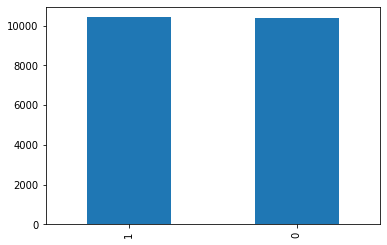

In [12]:
print(train_data['label'].value_counts())
train_data['label'].value_counts().plot.bar()

Na početku smo čelije u dataframu koje imaju NaN vrijednosti zamijenili sa blankovima. U dataset train smo dodali stupac All koji predstavlja kombinaciju title i teksta. Tekst koji imamo trebamo raspodijeliti po riječima. Za to koristimo tokenizaciju. Da bi poboljšali svoj dataset, mičemo interpunkciju i  stop-words kao što su (my, I, is, the, a). Mičemo 
interpunkcije i stavljamo da budu sve mala slova jer inače npr. riječi Friend i friend gleda kao različite riječi.
Kako u tekstu imamo riječi koje se razlikuju samo u nastavku, tj. zbog nastavka u množini,  glagolskom vremenu, koristimo lematizaciju. 

In [13]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nikolina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nikolina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nikolina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nikolina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
lemmatizer=WordNetLemmatizer()

In [15]:
lemmatizacija(train_data)
lemmatizacija(test_data)

In [16]:
X_train=train_data['all']
y_train=train_data['label']

X_test_data=test_data['all']

In [17]:

X_train, X_test, y_train, y_test=train_test_split(X_train,y_train,test_size=0.25, random_state=7, shuffle=True)

# Logistička regresija

In [18]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('logistic', LogisticRegression(solver='liblinear'))
])
model=pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy  on test set: {:.2f}'.format(model.score(X_test, y_test)))
print(f"Classification Report : \n{classification_report(y_test, y_pred)}") 


Accuracy  on test set: 0.96
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2586
           1       0.95      0.96      0.96      2614

    accuracy                           0.96      5200
   macro avg       0.96      0.96      0.96      5200
weighted avg       0.96      0.96      0.96      5200



In [19]:
conf_matrix=confusion_matrix(y_test, y_pred)
conf_matrix=confusion_matrix(y_test, y_pred)
cn = sns.light_palette("blue", as_cmap=True)
x=pd.DataFrame(conf_matrix)
x=x.style.background_gradient(cmap=cn)
display(x)

,0,1
0,2467,119
1,96,2518


# Passive Aggresive Classifier

In [20]:
pipeline_pac = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('passive aggresive', PassiveAggressiveClassifier(C = 0.5, random_state = 5))
])
model_pac=pipeline_pac.fit(X_train, y_train)
y_pred = model_pac.predict(X_test)
print('Accuracy  on test set: {:.2f}'.format(model.score(X_test, y_test)))
print(f"Classification Report : \n{classification_report(y_test, y_pred)}") 


Accuracy  on test set: 0.96
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2586
           1       0.97      0.97      0.97      2614

    accuracy                           0.97      5200
   macro avg       0.97      0.97      0.97      5200
weighted avg       0.97      0.97      0.97      5200



In [21]:
conf_matrix=confusion_matrix(y_test, y_pred)
cn = sns.light_palette("blue", as_cmap=True)
x=pd.DataFrame(conf_matrix)
x=x.style.background_gradient(cmap=cn)
display(x)


,0,1
0,2516,70
1,81,2533


# Naivni Bayes

In [22]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('multinomial nb', MultinomialNB())
])
model=pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy  on test set: {:.2f}'.format(model.score(X_test, y_test)))
print(f"Classification Report : \n{classification_report(y_test, y_pred)}") 


Accuracy  on test set: 0.84
Classification Report : 
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      2586
           1       0.99      0.69      0.81      2614

    accuracy                           0.84      5200
   macro avg       0.87      0.84      0.83      5200
weighted avg       0.87      0.84      0.83      5200



In [23]:
conf_matrix=confusion_matrix(y_test, y_pred)
cn = sns.light_palette("blue", as_cmap=True)
x=pd.DataFrame(conf_matrix)
x=x.style.background_gradient(cmap=cn)
display(x)

,0,1
0,2569,17
1,823,1791


#  Random Forest Classifier

In [24]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('randomforest', RandomForestClassifier())
])
model=pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy  on test set: {:.2f}'.format(model.score(X_test, y_test)))
print(f"Classification Report : \n{classification_report(y_test, y_pred)}") 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy  on test set: 0.87
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      2586
           1       0.92      0.81      0.86      2614

    accuracy                           0.87      5200
   macro avg       0.87      0.87      0.87      5200
weighted avg       0.87      0.87      0.87      5200



In [25]:
conf_matrix=confusion_matrix(y_test, y_pred)
cn = sns.light_palette("blue", as_cmap=True)
x=pd.DataFrame(conf_matrix)
x=x.style.background_gradient(cmap=cn)
display(x)

,0,1
0,2397,189
1,499,2115


# Predviđanje na testnom datasetu pomoću Passive Aggresive

In [26]:
y_test_pred = model_pac.predict(X_test_data)

In [27]:
df_test_prediction=pd.DataFrame(y_test_pred,columns=['label'])

In [28]:
df_test_prediction['label'].value_counts()

0    2608
1    2592
Name: label, dtype: int64

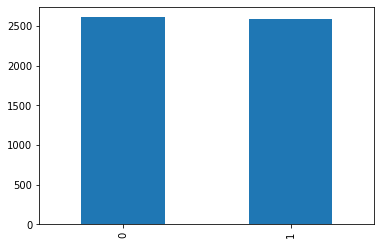

In [29]:
df_test_prediction['label'].value_counts().plot.bar()